# Testing the `preprocess` module

**Authorship:**
Adam Klie, *10/04/2022*
***
**Description:**
Notebook for testing out the `preprocess` module.

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import torch
import numpy as np
import pandas as pd
import eugene as eu

Global seed set to 13


GPU is available: True
Number of GPUs: 1
Current GPU: 0
GPUs: Quadro RTX 5000


Matplotlib is building the font cache; this may take a moment.


# Sequence preprocessing

## Prep data

In [2]:
seq = eu.utils._random_data.random_seq(seq_len=10)
seq

'CACACCAGAC'

In [3]:
seqs = eu.utils._random_data.random_seqs(seq_num=5, seq_len=10)
seqs

array(['TCACCCCGGC', 'GTACATGTTC', 'GTGCAATAAC', 'CCAGTTGATC',
       'AGGATGGTTG'], dtype='<U10')

In [4]:
jagged_seqs = [eu.utils._random_data.random_seq(seq_len=10), eu.utils._random_data.random_seq(seq_len=5)]
jagged_seqs

['CTCCTTTTCC', 'TATCA']

## Test `_seq_preprocess.py` functions

### Sanitize seqs

In [5]:
# TODO: add tests for the following functions

### Ascii encode seqs

In [6]:
# TODO: add tests for the following functions

### Reverse complement

In [11]:
from eugene.preprocess import reverse_complement_seq, reverse_complement_seqs

In [12]:
rc_seq = reverse_complement_seq(seq)
seq, rc_seq, reverse_complement_seq(rc_seq)

('CACACCAGAC', 'GTCTGGTGTG', 'CACACCAGAC')

In [55]:
rc_seqs = reverse_complement_seqs(seqs)
seqs, rc_seqs, reverse_complement_seqs(rc_seqs)

Reverse complementing sequences:   0%|          | 0/5 [00:00<?, ?it/s]

Reverse complementing sequences:   0%|          | 0/5 [00:00<?, ?it/s]

(array(['TCACCCCGGC', 'GTACATGTTC', 'GTGCAATAAC', 'CCAGTTGATC',
        'AGGATGGTTG'], dtype='<U10'),
 array(['GCCGGGGTGA', 'GAACATGTAC', 'GTTATTGCAC', 'GATCAACTGG',
        'CAACCATCCT'], dtype='<U10'),
 array(['TCACCCCGGC', 'GTACATGTTC', 'GTGCAATAAC', 'CCAGTTGATC',
        'AGGATGGTTG'], dtype='<U10'))

In [14]:
reverse_complement_seqs(jagged_seqs)

Reverse complementing sequences:   0%|          | 0/2 [00:00<?, ?it/s]

array(['GGAAAAGGAG', 'TGATA'], dtype='<U10')

### One hot encoding

In [15]:
DNA = ["A", "C", "G", "T"]
RNA = ["A", "C", "G", "U"]
COMPLEMENT_DNA = {"A": "T", "C": "G", "G": "C", "T": "A"}
COMPLEMENT_RNA = {"A": "U", "C": "G", "G": "C", "U": "A"}

In [16]:
from eugene.preprocess._utils import _get_vocab_dict, _get_index_dict

In [17]:
_get_vocab_dict(DNA), _get_index_dict(DNA)

({'A': 0, 'C': 1, 'G': 2, 'T': 3}, {0: 'A', 1: 'C', 2: 'G', 3: 'T'})

In [18]:
from eugene.preprocess._utils import _tokenize, _token2one_hot, _one_hot2token, _sequencize

In [19]:
tokens = _tokenize(seq)
ohe = _token2one_hot(tokens)
decoded_tokens = _one_hot2token(ohe)
decoded_seq = _sequencize(decoded_tokens)
seq, tokens, ohe, decoded_tokens, decoded_seq

('CACACCAGAC',
 [1, 0, 1, 0, 1, 1, 0, 2, 0, 1],
 array([[0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8),
 array([1, 0, 1, 0, 1, 1, 0, 2, 0, 1]),
 'CACACCAGAC')

In [20]:
from eugene.preprocess._utils import _pad_sequences 

In [21]:
_pad_sequences(jagged_seqs, align="end", value="N"), _pad_sequences(jagged_seqs, align="start", value="$"), _pad_sequences(jagged_seqs, align="center", value="0")

(['CTCCTTTTCC', 'NNNNNTATCA'],
 ['CTCCTTTTCC', 'TATCA$$$$$'],
 ['CTCCTTTTCC', '000TATCA00'])

In [22]:
padded_seqs = _pad_sequences(jagged_seqs, align="end", value="N")
tokens = _tokenize(padded_seqs[1])
ohe = _token2one_hot(tokens, fill_value=0.25)
decoded_tokens = _one_hot2token(ohe)
decoded_seq = _sequencize(decoded_tokens)
padded_seqs[1], tokens, ohe, decoded_tokens, decoded_seq

('NNNNNTATCA',
 [-1, -1, -1, -1, -1, 3, 0, 3, 1, 0],
 array([[0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 1.  , 0.  , 0.  , 1.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 1.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25, 0.25, 1.  , 0.  , 1.  , 0.  , 0.  ]],
       dtype=float16),
 array([-1, -1, -1, -1, -1,  3,  0,  3,  1,  0]),
 'NNNNNTATCA')

In [23]:
from eugene.preprocess import ohe_seq, ohe_seqs, decode_seq, decode_seqs

In [24]:
ohe = ohe_seq(seq)
decoded_seq = decode_seq(ohe)
seq, ohe, decoded_seq

('CACACCAGAC',
 array([[0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float16),
 'CACACCAGAC')

In [56]:
ohes = ohe_seqs(seqs)
decoded_seqs = decode_seqs(ohes)
seqs, ohes, decoded_seqs

One-hot encoding sequences:   0%|          | 0/5 [00:00<?, ?it/s]

Decoding sequences:   0%|          | 0/5 [00:00<?, ?it/s]

(array(['TCACCCCGGC', 'GTACATGTTC', 'GTGCAATAAC', 'CCAGTTGATC',
        'AGGATGGTTG'], dtype='<U10'),
 array([[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 
        [[0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]],
 
        [[0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]],
 
        [[0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 0, 0, 1, 0]],
 
        [[1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
         [0, 0, 0, 0, 1, 0, 0, 1, 1, 0]]], dtype=int8),
 array(['TCACCCCGGC', 'GTACATGTTC', 'GTGCAATAAC', '

In [26]:
jagged_ohe_seqs = ohe_seqs(jagged_seqs)
jagged_decoded_seqs = decode_seqs(jagged_ohe_seqs)
jagged_seqs, jagged_ohe_seqs, jagged_decoded_seqs

One-hot encoding sequences:   0%|          | 0/2 [00:00<?, ?it/s]

Decoding sequences:   0%|          | 0/2 [00:00<?, ?it/s]

(['CTCCTTTTCC', 'TATCA'],
 array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 1, 1, 1, 1, 0, 0]],
 
        [[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]], dtype=int8),
 array(['CTCCTTTTCC', 'TATCANNNNN'], dtype='<U10'))

In [27]:
reverse_complement_seqs(seqs)

Reverse complementing sequences:   0%|          | 0/5 [00:00<?, ?it/s]

array(['GCCGGGGTGA', 'GAACATGTAC', 'GTTATTGCAC', 'GATCAACTGG',
       'CAACCATCCT'], dtype='<U10')

In [35]:
rc_seq

'GTCTGGTGTG'

In [36]:
decode_seq(reverse_complement_seq(ohe))

seq [[0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


'GTGTGGTCTG'

In [37]:
decode_seqs(reverse_complement_seqs(ohes))

seq [[[0 0 1 0 0 0 0 0 0 0]
  [0 1 0 1 1 1 1 0 0 1]
  [0 0 0 0 0 0 0 1 1 0]
  [1 0 0 0 0 0 0 0 0 0]]

 [[0 0 1 0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 1]
  [1 0 0 0 0 0 1 0 0 0]
  [0 1 0 0 0 1 0 1 1 0]]

 [[0 0 0 0 1 1 0 1 1 0]
  [0 0 0 1 0 0 0 0 0 1]
  [1 0 1 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0 1 0 0]
  [1 1 0 0 0 0 0 0 0 1]
  [0 0 0 1 0 0 1 0 0 0]
  [0 0 0 0 1 1 0 0 1 0]]

 [[1 0 0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0]
  [0 1 1 0 0 1 1 0 0 1]
  [0 0 0 0 1 0 0 1 1 0]]]


Decoding sequences:   0%|          | 0/5 [00:00<?, ?it/s]

array(['AGGATGGTTG', 'CCAGTTGATC', 'GTGCAATAAC', 'GTACATGTTC',
       'TCACCCCGGC'], dtype='<U10')

In [40]:
import torch
import numpy as np

In [48]:
ohes[1]

array([[0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]], dtype=int8)

In [54]:
torch.from_numpy(np.flip(ohes[1], axis=(0, 1)).copy()).numpy()

array([[0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0]], dtype=int8)

In [58]:
seqs[1]

'GTACATGTTC'

In [66]:
rc_seqs

array(['GCCGGGGTGA', 'GAACATGTAC', 'GTTATTGCAC', 'GATCAACTGG',
       'CAACCATCCT'], dtype='<U10')

In [67]:
eu.pp.decode_seqs(torch.from_numpy(np.flip(ohes, axis=(1,2)).copy()).numpy())

Decoding sequences:   0%|          | 0/5 [00:00<?, ?it/s]

array(['GCCGGGGTGA', 'GAACATGTAC', 'GTTATTGCAC', 'GATCAACTGG',
       'CAACCATCCT'], dtype='<U10')

In [38]:
rc_seqs

array(['GCCGGGGTGA', 'GAACATGTAC', 'GTTATTGCAC', 'GATCAACTGG',
       'CAACCATCCT'], dtype='<U10')

In [39]:
decode_seqs(ohes[:, ::-1, ::-1])

Decoding sequences:   0%|          | 0/5 [00:00<?, ?it/s]

array(['GCCGGGGTGA', 'GAACATGTAC', 'GTTATTGCAC', 'GATCAACTGG',
       'CAACCATCCT'], dtype='<U10')

### Dinucleotide shuffle

In [141]:
from eugene.preprocess import dinuc_shuffle_seq, dinuc_shuffle_seqs

In [142]:
dnt_shuf_seq = dinuc_shuffle_seq(seq, num_shufs=10)
seq, dnt_shuf_seq

('CACACCAGAC',
 ['CCACAGACAC',
  'CACACCAGAC',
  'CACAGACCAC',
  'CACCAGACAC',
  'CCACAGACAC',
  'CACCACAGAC',
  'CCACACAGAC',
  'CCACAGACAC',
  'CCACACAGAC',
  'CACAGACCAC'])

In [143]:
dnt_shuf_seqs = dinuc_shuffle_seqs(seqs)
seqs, dnt_shuf_seqs

(array(['TCACCCCGGC', 'GTACATGTTC', 'GTGCAATAAC', 'CCAGTTGATC',
        'AGGATGGTTG'], dtype='<U10'),
 array(['TCCACCCGGC', 'GTACATTGTC', 'GTGCAAATAC', 'CCAGTTGATC',
        'AGATTGGGTG'], dtype='<U10'))

### In silico mutagenesis

In [190]:
from eugene.preprocess import perturb_seq, perturb_seqs

In [202]:
decoded_perturb = decode_seqs(perturb_seq(ohe))
seq, decoded_perturb

Decoding sequences:   0%|          | 0/30 [00:00<?, ?it/s]

('CACACCAGAC',
 array(['GACACCAGAC', 'TACACCAGAC', 'AACACCAGAC', 'CCCACCAGAC',
        'CGCACCAGAC', 'CTCACCAGAC', 'CAGACCAGAC', 'CATACCAGAC',
        'CAAACCAGAC', 'CACCCCAGAC', 'CACGCCAGAC', 'CACTCCAGAC',
        'CACAGCAGAC', 'CACATCAGAC', 'CACAACAGAC', 'CACACGAGAC',
        'CACACTAGAC', 'CACACAAGAC', 'CACACCCGAC', 'CACACCGGAC',
        'CACACCTGAC', 'CACACCATAC', 'CACACCAAAC', 'CACACCACAC',
        'CACACCAGCC', 'CACACCAGGC', 'CACACCAGTC', 'CACACCAGAG',
        'CACACCAGAT', 'CACACCAGAA'], dtype='<U10'))

In [204]:
decoded_perturbs = decode_seqs(perturb_seqs(ohes)[0])
seqs[0], decoded_perturbs

Decoding sequences:   0%|          | 0/30 [00:00<?, ?it/s]

('TCACCCCGGC',
 array(['ACACCCCGGC', 'CCACCCCGGC', 'GCACCCCGGC', 'TGACCCCGGC',
        'TTACCCCGGC', 'TAACCCCGGC', 'TCCCCCCGGC', 'TCGCCCCGGC',
        'TCTCCCCGGC', 'TCAGCCCGGC', 'TCATCCCGGC', 'TCAACCCGGC',
        'TCACGCCGGC', 'TCACTCCGGC', 'TCACACCGGC', 'TCACCGCGGC',
        'TCACCTCGGC', 'TCACCACGGC', 'TCACCCGGGC', 'TCACCCTGGC',
        'TCACCCAGGC', 'TCACCCCTGC', 'TCACCCCAGC', 'TCACCCCCGC',
        'TCACCCCGTC', 'TCACCCCGAC', 'TCACCCCGCC', 'TCACCCCGGG',
        'TCACCCCGGT', 'TCACCCCGGA'], dtype='<U10'))

### Feature implant 

In [222]:
from eugene.preprocess._utils import _token2one_hot

In [302]:
# Prep data
meme = eu.dl.motif.MinimalMEME(path="../../_data/CPEs.meme")
motif = meme.motifs["TATA"]
name = motif.name
pfm = motif.pfm[4:8]
consensus = motif.consensus[4:8] 
pos = 2

In [304]:
eu.pp.feature_implant_across_seq(seq, consensus, encoding="str")

array(['TATACCAGAC', 'CTATACAGAC', 'CATATAAGAC', 'CACTATAGAC',
       'CACATATAAC', 'CACACTATAC', 'CACACCTATA'], dtype='<U10')

In [305]:
eu.pp.feature_implant_seq(ohe, pfm.T, pos, encoding="onehot")

array([[0.   , 1.   , 0.01 , 0.968, 0.002, 0.992, 1.   , 0.   , 1.   ,
        0.   ],
       [1.   , 0.   , 0.002, 0.   , 0.014, 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.002, 0.   , 0.006, 0.002, 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.986, 0.032, 0.978, 0.006, 0.   , 0.   , 0.   ,
        0.   ]])

In [261]:
eu.pp.feature_implant_across_seq(ohe, pfm.T, encoding="onehot")

array([[[0.01 , 0.968, 0.002, 0.992, 0.   , 0.   , 1.   , 0.   , 1.   ,
         0.   ],
        [0.002, 0.   , 0.014, 0.   , 1.   , 1.   , 0.   , 0.   , 0.   ,
         1.   ],
        [0.002, 0.   , 0.006, 0.002, 0.   , 0.   , 0.   , 1.   , 0.   ,
         0.   ],
        [0.986, 0.032, 0.978, 0.006, 0.   , 0.   , 0.   , 0.   , 0.   ,
         0.   ]],

       [[0.   , 0.01 , 0.968, 0.002, 0.992, 0.   , 1.   , 0.   , 1.   ,
         0.   ],
        [1.   , 0.002, 0.   , 0.014, 0.   , 1.   , 0.   , 0.   , 0.   ,
         1.   ],
        [0.   , 0.002, 0.   , 0.006, 0.002, 0.   , 0.   , 1.   , 0.   ,
         0.   ],
        [0.   , 0.986, 0.032, 0.978, 0.006, 0.   , 0.   , 0.   , 0.   ,
         0.   ]],

       [[0.   , 1.   , 0.01 , 0.968, 0.002, 0.992, 1.   , 0.   , 1.   ,
         0.   ],
        [1.   , 0.   , 0.002, 0.   , 0.014, 0.   , 0.   , 0.   , 0.   ,
         1.   ],
        [0.   , 0.   , 0.002, 0.   , 0.006, 0.002, 0.   , 1.   , 0.   ,
         0.   ],
        [0.   , 0

In [266]:
ohe

array([[0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float16)

In [265]:
eu.pp.feature_implant_seq(ohe, pfm, pos, encoding="onehot", onehot=True)

array([[0., 1., 0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]], dtype=float16)

In [267]:
eu.pp.feature_implant_across_seq(ohe, pfm, encoding="onehot", onehot=True)

array([[[0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 1., 0., 1., 1., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]],

       [[0., 1., 0., 1., 0., 1., 0., 1., 1., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0

In [3]:
sdata = eu.datasets.random1000()

In [4]:
eu.pp.one_hot_encode_data(sdata)

One-hot-encoding sequences:   0%|          | 0/1000 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 1000 ohe_seqs added


In [5]:
# Prep data
model = eu.models.DeepBind(input_len=66, output_dim=1)
seq = sdata.seqs[0]
ohe_seq = eu.pp.ohe_DNA_seq(seq)
meme = eu.utils.MinimalMEME(path="../../_datasets/jores21/CPEs.meme")
motif = meme.motifs["TATA"]
name = motif.name
pfm = motif.pfm
consensus = eu.pp.decode_DNA_seq(pfm)
pos = 2

In [6]:
eu.pp.feature_implant_seq(seq, consensus, pos, encoding="str")

'AGCCCCTATAAATACCCCTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG'

In [7]:
eu.pp.feature_implant_across_seq(seq, consensus, encoding="str")

array(['CCCCTATAAATACCCCTGTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'ACCCCTATAAATACCCCGTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGCCCCTATAAATACCCCTTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGCCCCTATAAATACCCCTGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACCCCTATAAATACCCCGGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACCCCCTATAAATACCCCGGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACACCCCTATAAATACCCCGCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGCCCCTATAAATACCCCCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGACCCCTATAAATACCCCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATCCCCTATAAATACCCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATTCCCCTATAAATACCCCAACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATTTCCCCTATAAATACCCCACGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',
       'AGGACAGATTTTCCCCTATAAATACCCCCGGATCAGCCTCTATAAACCGTATCCGACAATATAAGG',

In [8]:
eu.pp.feature_implant_seq(ohe_seq, pfm, pos, encoding="onehot")

array([[1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , 0.    ],
       [0.1275, 0.3765, 0.1195, 0.3765],
       [0.1575, 0.3985, 0.199 , 0.2455],
       [0.249 , 0.303 , 0.197 , 0.251 ],
       [0.1235, 0.655 , 0.0755, 0.1455],
       [0.01  , 0.002 , 0.002 , 0.986 ],
       [0.968 , 0.    , 0.    , 0.032 ],
       [0.002 , 0.014 , 0.006 , 0.978 ],
       [0.992 , 0.    , 0.002 , 0.006 ],
       [0.653 , 0.012 , 0.002 , 0.333 ],
       [0.974 , 0.    , 0.008 , 0.018 ],
       [0.341 , 0.028 , 0.036 , 0.5955],
       [0.6955, 0.0815, 0.1195, 0.1035],
       [0.1255, 0.432 , 0.3165, 0.1255],
       [0.291 , 0.418 , 0.175 , 0.1155],
       [0.263 , 0.3445, 0.1755, 0.2175],
       [0.307 , 0.3085, 0.2365, 0.1475],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 1.    , 0.    ],
       [0.    , 1.    , 0.    , 0.    ],
       [0.    , 

In [9]:
eu.pp.feature_implant_across_seq(ohe_seq, pfm, encoding="onehot")

array([[[0.1275, 0.3765, 0.1195, 0.3765],
        [0.1575, 0.3985, 0.199 , 0.2455],
        [0.249 , 0.303 , 0.197 , 0.251 ],
        ...,
        [1.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ]],

       [[1.    , 0.    , 0.    , 0.    ],
        [0.1275, 0.3765, 0.1195, 0.3765],
        [0.1575, 0.3985, 0.199 , 0.2455],
        ...,
        [1.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ]],

       [[1.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ],
        [0.1275, 0.3765, 0.1195, 0.3765],
        ...,
        [1.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ]],

       ...,

       [[1.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ],
        [0.    , 0.    , 1.    , 0.    ],
        ...,
        [0.307 , 0.3085, 0.2365, 0.1475],
     

In [10]:
eu.pp.feature_implant_across_seq(ohe_seq, pfm, encoding="onehot", onehot=True)

array([[[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1.

In [11]:
eu.interpret.feature_implant(
    model, 
    sdata, 
    seq_id=sdata.names[0], 
    feature=consensus, 
    feature_name=name, 
    encoding="str", 
    onehot=False, 
    device="cpu", 
    store=True
)

array([-0.12860738, -0.20724249, -0.09944402, -0.15735872, -0.07232916,
        0.10080706, -0.05799149, -0.00366257, -0.13281582, -0.03578924,
        0.07352825, -0.08969332, -0.14790955, -0.19986603, -0.17278814,
       -0.18217488, -0.07786699, -0.18028736, -0.13209815, -0.0564633 ,
       -0.15503126, -0.09165487, -0.11240477, -0.0220406 , -0.00690747,
       -0.05037049, -0.13428695, -0.07957186,  0.05299611, -0.00722817,
       -0.05692093, -0.06351749, -0.12362285, -0.04635581, -0.10504552,
        0.02596581,  0.10609262, -0.04033621, -0.09065762, -0.05444472,
       -0.05513809, -0.08035021, -0.02563847, -0.05098003,  0.05189031,
       -0.14998351,  0.04425012,  0.00295492, -0.0998994 , -0.09659025,
       -0.06869654], dtype=float32)

In [16]:
eu.interpret.feature_implant_sdata(
    model,
    sdata,
    feature=consensus,
    seqsm_key=f"{name}_slide",
    encoding="str",
    onehot=False,
    device="cpu"
)

Implanting feature:   0%|          | 0/1000 [00:00<?, ?it/s]

In [17]:
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: PyRanges object with 1400 features
seqsm: 'seq000_TATA_slide', 'TATA_slide'
uns: None

## Preprocess a random dataset by hand

### Load

In [19]:
names, seqs, rev_seqs, targets = eu.dl.read("/cellar/users/aklie/data/eugene/random_datasets/random100seqs_66bp/random_seqs.tsv", seq_col="SEQ", name_col="NAME", target_col="ACTIVITY", rev_comp=True, return_numpy=True)
names[0], seqs[0], rev_seqs[0], targets[0]

('seq001',
 'CAGCCGGTCCATACACCAAGGGCATCTACTTGGGCAAGGGTGTACCCCTTGTGGCTTGGAAGAAGG',
 'CCTTCTTCCAAGCCACAAGGGGTACACCCTTGCCCAAGTAGATGCCCTTGGTGTATGGACCGGCTG',
 0.0570990784451763)

### Reverse Complement

In [268]:
rev_seqs = eu.pp.reverse_complement_seqs(seqs)
rev_ohe_seqs = eu.pp.ohe_DNA_seqs(rev_seqs)
decoded_rev_seqs = eu.pp.decode_DNA_seqs(rev_ohe_seqs)
rev_seqs[0], seqs[0], decoded_rev_seqs[0]

Reverse complementing sequences:   0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: module 'eugene.preprocessing' has no attribute 'ohe_DNA_seqs'

In [269]:
rev_ohe_seqs[0][:5], rev_seqs[0][:5]

NameError: name 'rev_ohe_seqs' is not defined

### One-hot-encoding 

In [22]:
ohe_seq = eu.pp.ohe_DNA_seq(seqs[0])
decoded_seq = eu.pp.decode_DNA_seq(ohe_seq)
seqs[0], ohe_seq[:5], decoded_seq

('CAGCCGGTCCATACACCAAGGGCATCTACTTGGGCAAGGGTGTACCCCTTGTGGCTTGGAAGAAGG',
 array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]]),
 'CAGCCGGTCCATACACCAAGGGCATCTACTTGGGCAAGGGTGTACCCCTTGTGGCTTGGAAGAAGG')

In [23]:
ohe_seqs = eu.pp.ohe_DNA_seqs(seqs)
decoded_seqs = eu.pp.decode_DNA_seqs(ohe_seqs)
seqs[0][:5], ohe_seqs[0][:5], decoded_seqs[0][:5]

('CAGCC',
 array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]]),
 'CAGCC')

### Encode Names

In [24]:
encoded_names = [eu.pp.ascii_encode(name) for name in names]
decoded_names = [eu.pp.ascii_decode(name) for name in encoded_names]
names[0], encoded_names[0], decoded_names[0]

('seq001', array([115, 101, 113,  48,  48,  49]), 'seq001')

### Dinucleotide Shuffle

In [25]:
eu.pp.dinuc_shuffle_seq(seqs[0])

'CCAGGTCCTGGTATTAGCCCAGGGTGCTCAGGGGCACCATTACAAAAACGACCTGGGCTGTTGAGG'

In [26]:
eu.pp.decode_DNA_seq(eu.pp.dinuc_shuffle_seq(ohe_seqs[0]))

'CCAAATGCGGGGCAGTGTCTGCCCCCCAGCTTTCAGGTGGTATAACACACTACTTGGGAGGAAGGG'

# Dataset preprocessing

## Dataset Processing

In [27]:
train_seqs, test_seqs, train_targets, test_targets = eu.pp.split_train_test(ohe_seqs, targets)
len(train_seqs), len(test_seqs), len(train_targets), len(test_targets)

(80, 20, 80, 20)

# SeqData preprocessing

## Working with sdata

In [29]:
sdata = eu.datasets.random1000()

In [30]:
eu.pp.reverse_complement_data(sdata)
eu.pp.one_hot_encode_data(sdata)
eu.pp.train_test_split_data(sdata)
sdata

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added
SeqData object modified:
	ohe_seqs: None -> 1000 ohe_seqs added
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added
SeqData object modified:
    seqs_annot:
        + TRAIN


SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = (1000,)
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = (1000, 66, 4)
seqs_annot: 'TARGETS', 'TRAIN'
pos_annot: PyRanges object with 1456 features

In [31]:
sdata = eu.datasets.random1000()
eu.pp.prepare_data(sdata)

  0%|          | 0/3 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added
	ohe_seqs: None -> 1000 ohe_seqs added
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added
    seqs_annot:
        + TRAIN


In [6]:
sdata = eu.datasets.random1000()

In [7]:
eu.pp.sanitize_seqs_sdata(sdata, copy=True)

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

In [8]:
eu.pp.ohe_seqs_sdata(sdata)

One-hot encoding sequences:   0%|          | 0/1000 [00:00<?, ?it/s]

SeqData object modified:
	ohe_seqs: None -> 1000 ohe_seqs added


In [9]:
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 4, 66)
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

In [10]:
eu.pp.reverse_complement_seqs_sdata(sdata, rc_seqs=False, copy=False)

seq [[[1 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 0]
  [0 1 1 ... 0 1 1]
  [0 0 0 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  [0 1 0 ... 0 0 0]
  [1 0 0 ... 1 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 0 0 0]
  [1 0 1 ... 0 0 0]]

 ...

 [[0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]
  [1 0 1 ... 0 1 1]]

 [[0 1 0 ... 1 0 0]
  [0 0 1 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  [1 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [1 0 1 ... 1 0 1]
  [0 0 0 ... 0 1 0]]]
SeqData object modified:
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added


In [11]:
sdata.ohe_seqs[0]

array([[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int8)

In [17]:
eu.pp.decode_seq(sdata.ohe_rev_seqs[10])

'CTTGTTAGCTGTGTTTAGGATAGAGCGGCACAACTTGGGCCATAAGTGGGCGGACAACCACTGTAC'

In [18]:
sdata_copy.rev_seqs[10]

'CTTGTTAGCTGTGTTTAGGATAGAGCGGCACAACTTGGGCCATAAGTGGGCGGACAACCACTGTAC'

In [14]:
sdata_copy = eu.pp.reverse_complement_seqs_sdata(sdata, rc_seqs=True, copy=True)
sdata, sdata_copy

Reverse complementing sequences:   0%|          | 0/1000 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added


(SeqData object with = 1000 seqs
 seqs = (1000,)
 names = (1000,)
 rev_seqs = None
 ohe_seqs = (1000, 4, 66)
 ohe_rev_seqs = (1000, 4, 66)
 seqs_annot: 'target'
 pos_annot: PyRanges object with 1400 features
 seqsm: None
 uns: None,
 SeqData object with = 1000 seqs
 seqs = (1000,)
 names = (1000,)
 rev_seqs = (1000,)
 ohe_seqs = (1000, 4, 66)
 ohe_rev_seqs = (1000, 4, 66)
 seqs_annot: 'target'
 pos_annot: PyRanges object with 1400 features
 seqsm: None
 uns: None)

In [111]:
eu.pp.train_test_split_sdata(sdata)
sdata

SeqData object modified:
    seqs_annot:
        + train_val


SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 4, 66)
ohe_rev_seqs = (1000, 4, 66)
seqs_annot: 'target', 'train_val'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

In [115]:
eu.pp.clean_nan_targets_sdata(sdata, target_keys="target", copy=True)

Dropped targets: []


SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = (1000, 4, 66)
ohe_rev_seqs = (1000, 4, 66)
seqs_annot: 'target', 'train_val'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None

In [ ]:
import matplotlib.pyplot as plt

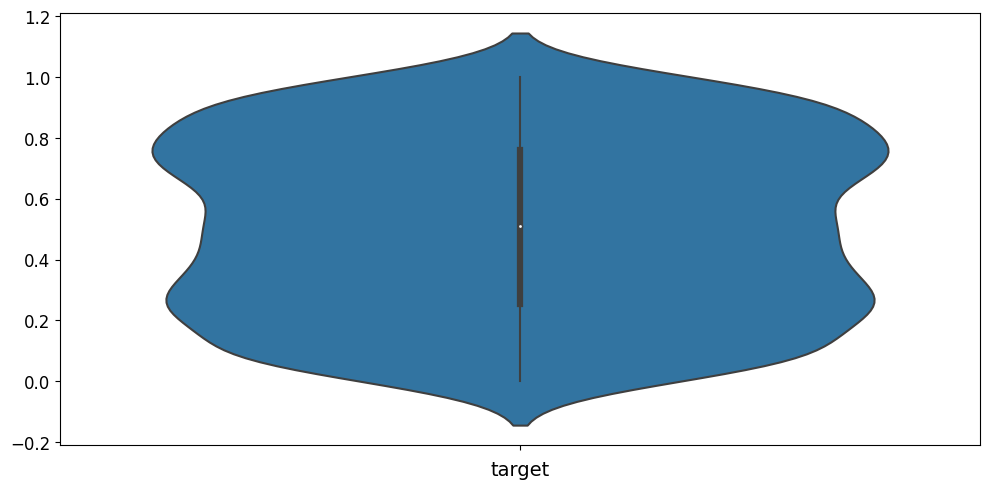

In [118]:
eu.pl.violinplot(
    sdata,
    keys="target",
)

In [119]:
eu.pp.clamp_targets_sdata(sdata, target_keys="target", percentile=0.5)

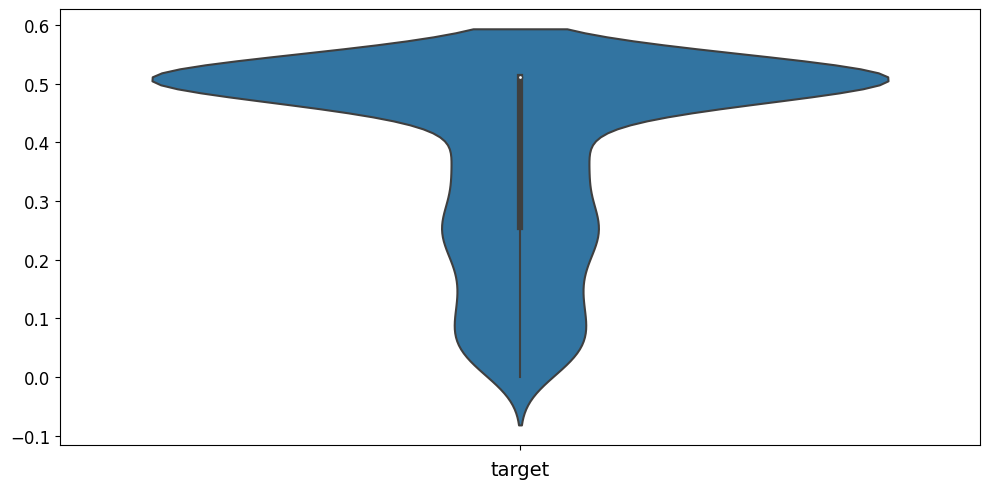

In [123]:
eu.pl.violinplot(
    sdata,
    keys="target",
)
plt.show()

In [125]:
eu.pp.scale_targets_sdata(sdata, target_keys="target", copy=False)

/home/vscode/.local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


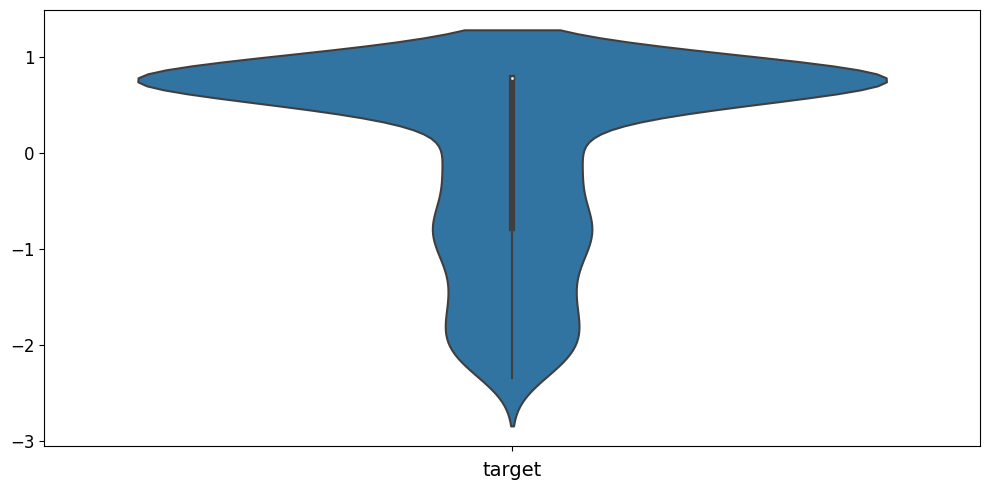

In [126]:
eu.pl.violinplot(
    sdata,
    keys="target",
)
plt.show()

In [139]:
eu.pp.binarize_targets_sdata(sdata, target_keys="target", upper_threshold=0, suffix=True, copy=False)

In [140]:
sdata.seqs_annot

,target,train_val,target_binarized
seq000,0.782430,True,1.0
seq001,0.782430,True,1.0
seq002,0.782430,True,1.0
seq003,0.505889,False,1.0
seq004,0.782430,False,1.0
...,...,...,...
seq995,-2.330127,True,0.0
seq996,0.782430,True,1.0
seq997,0.782430,True,1.0
seq998,-0.547166,True,0.0


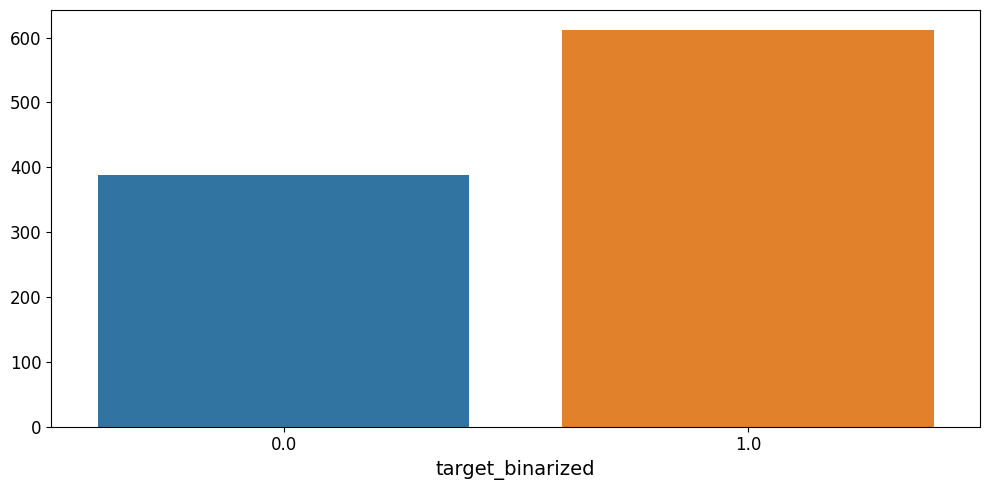

In [141]:
eu.pl.countplot(
    sdata,
    keys="target_binarized",
)
plt.show()

---